In [1]:
import streamlit as st
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from model import MNISTModel
from sklearn import metrics

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

# set download to true if don't have the dataset.
fullData = torchvision.datasets.MNIST(
    root="./MNIST",
    train=True,
    transform=transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
    ),
    download=False,
)

cuda


/home/ykc/dev/miniconda3/envs/torch/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448238472/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
N = len(fullData)
trainL = int(0.9 * N)
testL = N - trainL

trainData, testData = Data.random_split(fullData, [trainL, testL])

In [4]:
batch_size = 512

trainLoader = Data.DataLoader(dataset=trainData, batch_size=batch_size, shuffle=True)
testLoader = Data.DataLoader(dataset=testData, batch_size=testL, shuffle=True)
testX, testY = next(iter(testLoader))
testX, testY = testX.to(device), testY.to(device)

model = MNISTModel(inChannels=1, outChannels=32).to(device)
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=1e-4)
epochs = 1

In [5]:
history = [[], []]
currentMax = np.inf
for _ in range(epochs):
    for trainX, trainY in trainLoader:
        model.train()
        trainX = trainX.to(device)
        trainY = trainY.to(device)

        result = model(trainX)
        loss = criterion(result, trainY)
        loss.backward()
        optim.step()
        optim.zero_grad()
        history[0].append(loss.item())
        with torch.no_grad():
            model.eval()
            result = model(testX)
            val_loss = criterion(result, testY)
            history[1].append(val_loss.item())
            print(f"loss: {loss.item()} val_loss: {val_loss.item()}")
        if val_loss.item() <= currentMax:
            curremtMax = val_loss.item()
            torch.save(model, "checkpoint.pt")
            print("model saved")

/home/ykc/dev/miniconda3/envs/torch/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448238472/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


loss: 2.297577381134033 val_loss: 2.299563407897949
model saved
loss: 2.283827066421509 val_loss: 2.2970035076141357
model saved
loss: 2.2602198123931885 val_loss: 2.294132947921753
model saved
loss: 2.2367749214172363 val_loss: 2.290884494781494
model saved
loss: 2.220116138458252 val_loss: 2.287209987640381
model saved
loss: 2.1956613063812256 val_loss: 2.2830536365509033
model saved
loss: 2.1753673553466797 val_loss: 2.2783427238464355
model saved
loss: 2.1365339756011963 val_loss: 2.2730395793914795
model saved
loss: 2.127300977706909 val_loss: 2.26704740524292
model saved
loss: 2.0943243503570557 val_loss: 2.260267972946167
model saved
loss: 2.058255910873413 val_loss: 2.2526137828826904
model saved
loss: 2.027944564819336 val_loss: 2.244008779525757
model saved
loss: 2.009911298751831 val_loss: 2.2343592643737793
model saved
loss: 1.99503493309021 val_loss: 2.2235910892486572
model saved
loss: 1.973358392715454 val_loss: 2.2116219997406006
model saved
loss: 1.9371904134750366 val

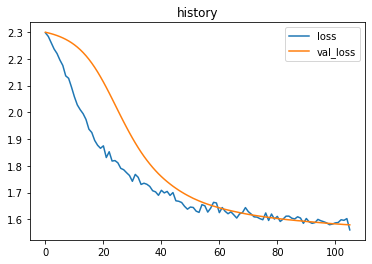

In [6]:
plt.plot(history[0], label="loss")
plt.plot(history[1], label="val_loss")
plt.legend()
plt.title("history")
plt.show()

accuracy: 0.925


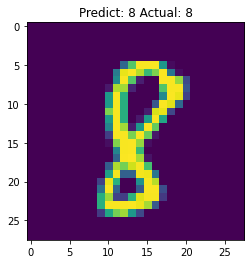

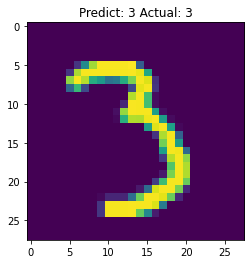

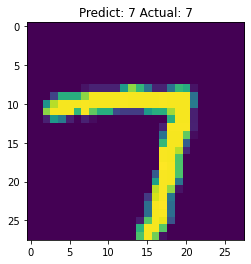

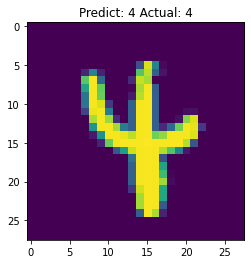

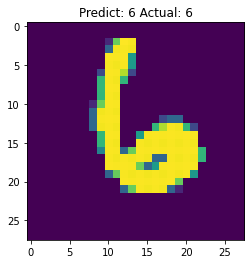

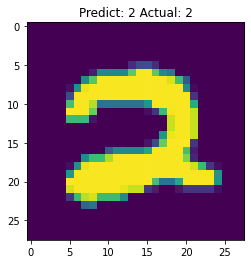

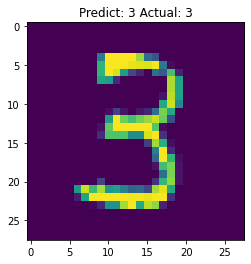

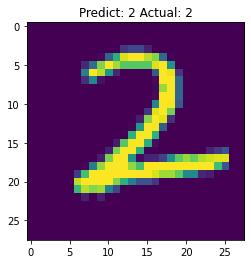

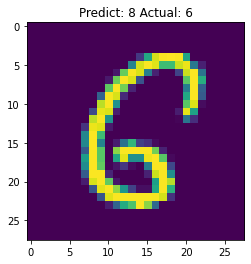

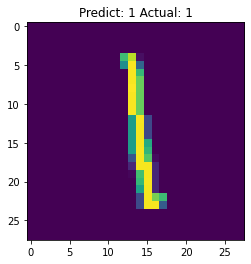

In [7]:
model = torch.load("checkpoint.pt")
with torch.no_grad():
    model.eval()
    testY = testY.cpu().numpy()
    pred = model(testX)
    _, result = torch.max(pred, 1)
    result = result.cpu().numpy()

print(f"accuracy: {metrics.accuracy_score(testY, result)}")
for i in range(10):
    plt.imshow(testX[i].squeeze(0).cpu().numpy())
    plt.title(f"Predict: {result[i]} Actual: {testY[i]}")
    plt.show()